David López Valdivia y Jimena de Prado González

# SEMANA 1

- Empezamos importando las librerías que vamos a usar y el dataset

In [402]:
import numpy as np, pandas as pd, seaborn as sns
import scipy
from matplotlib import pyplot as plt
pd.set_option.display_maxcolumns = 100
data = pd.read_csv('fuga_clientes_empresa_telefonica_construccion.csv')
data_explot=pd.read_csv('fuga_clientes_empresa_telefonica_construccion.csv')




## 1.1 Limpieza del dataset

- Vamos a empezar indicando que variables tienen valores nulos y cuáles tienen outliers para facilitar el preprocesado. 

Haremos la partición de train y test al final del preprocesado para evitar más lineas de las necesarias, ya que todas las modificaciones que aplicamos son válidas para ambos conjuntos. Una vez creemos test haremos algún cambio adicional sobre este, como borrar Churn Status.

#### <span style='color:steelblue'> Valores nulos: </span>

In [403]:
data.isnull().sum()

Customer ID                                  0
network_age                                  0
Customer tenure in month                     0
Total Spend in Months 1 and 2 of 2017        0
Total SMS Spend                              0
Total Data Spend                             0
Total Data Consumption                       0
Total Unique Calls                           0
Total Onnet spend                            0
Total Offnet spend                           0
Total Call centre complaint calls            0
Network type subscription in Month 1         0
Network type subscription in Month 2        22
Most Loved Competitor network in Month 1     1
Most Loved Competitor network in Month 2     1
Churn Status                                 0
dtype: int64

#### <span style='color:steelblue'> Outliers: </span>

In [404]:
#Función para detectar outliers:
def is_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR = Q3-Q1
    return (df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))
#Tomamos solo las variables numéricas
data_numericos = data.loc[:, data.dtypes != object]

is_outlier_IQR(data_numericos).sum()

network_age                                5
Customer tenure in month                   5
Total Spend in Months 1 and 2 of 2017     62
Total SMS Spend                          111
Total Data Spend                         114
Total Data Consumption                   157
Total Unique Calls                       101
Total Onnet spend                        120
Total Offnet spend                       145
Total Call centre complaint calls        124
Churn Status                               0
dtype: int64

### a) Customer ID

- Esta variable representa los ID de todos los clientes, veamos sus valores únicos para comprobarlo:

In [405]:
data['Customer ID'].unique()

array(['ADF0039', 'ADF0040', 'ADF0041', ..., 'ADF1998', 'ADF1999',
       'ADF2000'], dtype=object)

- Como esta variable no es relevante podemos eliminarla

In [406]:
data= data.drop('Customer ID', axis = 1)

### b) network_age

Esta variable numérica informa sobre ...... .Nos encontramos 5 outliers

In [407]:
print('Número de outliers:',is_outlier_IQR(data['network_age']).sum())
print('Numero de valores nulos:',data['network_age'].isnull().sum())

Número de outliers: 5
Numero de valores nulos: 0


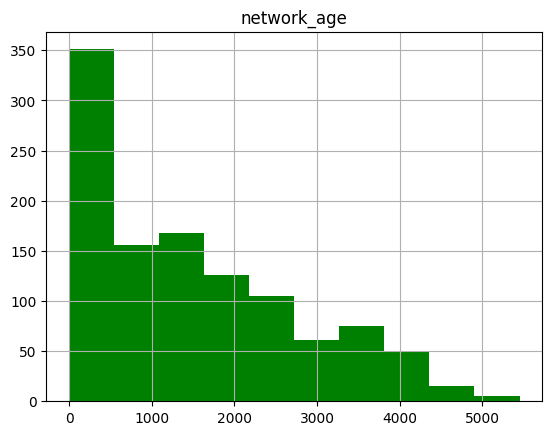

In [408]:
fig, ax = plt.subplots(1, 1) 
ax.hist(data['network_age'],color = "green") 
  
ax.set_title("network_age")
plt.grid()
plt.show()

### c) Customer tenure in month

In [409]:
data['Customer tenure in month'].value_counts()

Customer tenure in month
3.90      7
3.67      6
4.17      5
4.00      4
3.57      4
         ..
20.87     1
107.10    1
23.97     1
73.83     1
31.23     1
Name: count, Length: 883, dtype: int64

- Por sus valores se puede deducir que se trata de una variable numérica representa los meses que lleva un cliente en la compañía

- Recordemos que esta columna tenía 5 outliers, veamos cuales son sus valores

In [410]:
outliermth = data['Customer tenure in month'][is_outlier_IQR(data['Customer tenure in month'])]
outliermth

8      177.80
172    172.60
208    181.70
353    172.70
484    179.13
Name: Customer tenure in month, dtype: float64

- Consideremos la posibilidad de que pueda tener una distribución de cola pesada

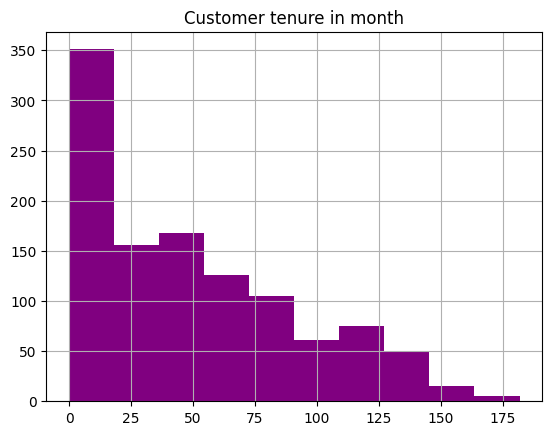

In [411]:
fig, ax = plt.subplots(1, 1) 
ax.hist(data['Customer tenure in month'],color = "purple") 
  
ax.set_title("Customer tenure in month")
plt.grid()
plt.show()

- Como así es, realicemos un ajuste logarítmico para ver si dejamos de tener outliers

In [412]:
log = np.log10(data['Customer tenure in month']+1)

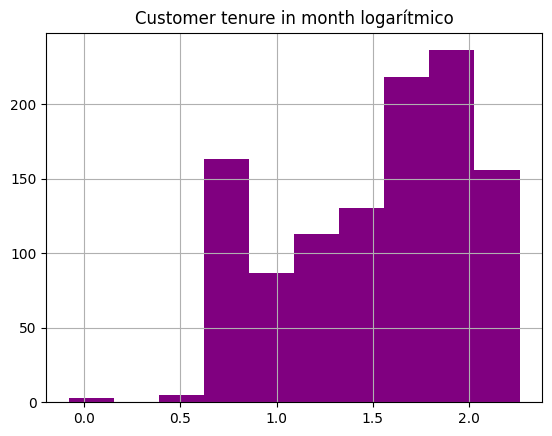

In [413]:
fig, ax = plt.subplots(1, 1) 
ax.hist(log,color = "purple") 
  
ax.set_title("Customer tenure in month logarítmico")
plt.grid()
plt.show()

### d) Total Spend in Months 1 and 2 of 2017

In [414]:
print('Número de outliers:',is_outlier_IQR(data['network_age']).sum())
print('Número de valores nulos:',data['network_age'].isnull().sum())

Número de outliers: 5
Número de valores nulos: 0


Esta variable nos hablar de

### e) Total SMS Spend

In [415]:
data['Total SMS Spend'].value_counts()

Total SMS Spend
0.00     163
1.75      42
3.50      20
0.01      19
5.25      18
        ... 
56.72      1
35.32      1
26.18      1
9.49       1
32.40      1
Name: count, Length: 601, dtype: int64

- Por estos valores podemos deducir que se trata del gasto en mensajes SMS de cada cliente 

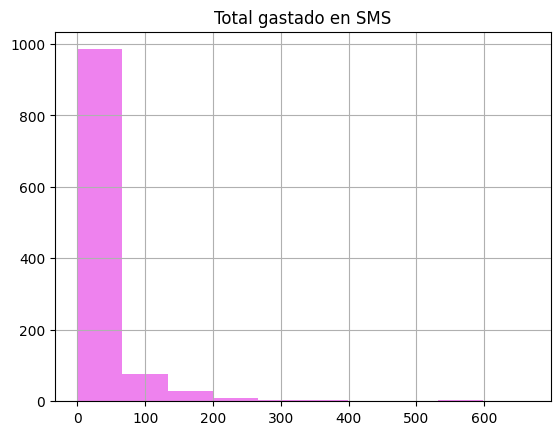

In [416]:
fig, ax = plt.subplots(1, 1) 
ax.hist(data['Total SMS Spend'],color = "violet") 
  
ax.set_title('Total gastado en SMS')
plt.grid()
plt.show()

- Veamos si con una distribución logarítmica podemos tartar el problema de los outliers

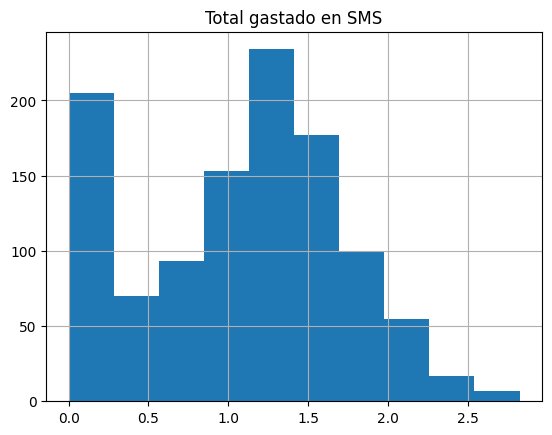

In [417]:
fig, ax = plt.subplots(1, 1) 
ax.hist(np.log10(data['Total SMS Spend']+1) )
  
ax.set_title('Total gastado en SMS')
plt.grid()
plt.show()

### f) Total Data Spend

### g) Total Data Consumption

In [418]:
data['Total Data Consumption'].unique()

array([1.47383000e+01, 8.34497342e+07, 7.11599229e+04, ...,
       1.31274587e+05, 2.16600627e+06, 1.82811500e+02])

** Es numérica la dejamos de momento

### h) Total Unique Calls

### i) Total Onnet spend

In [419]:
data['Total Onnet spend'].unique()

array([  2940,      0,    131,    696,  18635,   5532,    600,   2892,
        15225,   1428,   2155,    120,  10578,  17184,  10305,   1470,
        13980,    885,   7260,   2832,     60,    480,   1024,    906,
          228,     24,    168,    888,  38778,  10255,    486,  24828,
         1254,  31601,   2710,    502,  11478,   1908,     12,  75699,
          564,   3024,  10516,   5080,    275,  24450,   5271,  11378,
          813,  18100,   4744,    992,   1092,   5713,    804,   4338,
          558,   1304,  49351,   5568,  10008,    324,  55390,   5287,
         1506,   2799,   9395,   1829,   5472,  71208,   3387,  12324,
          287,    216,  48720,   2850,    970,  16087,    753,  64872,
         4131,    526,   4584,   4853,   8928,   2421,    738,   1243,
         4569,   5634,    570,    132,   7608,  18603,   9666,   2700,
         2268,   3452,   4434,   8856,  17408,   2634,  10137,   1248,
        18157,    610,  15228,   7852,  37401,   4260,   8608,    240,
      

** Es numérica lo dejas hasta hacer el modelo 

### j) Total Offnet spend

### k) Total Call centre complaint calls

In [420]:
data['Total Call centre complaint calls'].unique()

array([ 4,  2,  1,  3,  5, 13, 12,  6, 14,  8, 16,  7, 11, 21, 10,  9, 18,
       15, 49], dtype=int64)

** Es numérica siguiente

### l)Network type subscription in Month 1

Variable categórica que nos indica el tipo de suscripción en el primer mes.

In [421]:
data = pd.get_dummies(data, columns=['Network type subscription in Month 1'], dtype= int, drop_first= True)
data_explot = pd.get_dummies(data_explot, columns=['Network type subscription in Month 1'], dtype= int, drop_first= True)

# Tratamos los valores nulos antes de seguir con el modelo. Probamos, y luego volvemos por si tenemos que tratar outliers

### m) Network type subscription in Month 2

- Representa el tipo de red a la que se suscribió el cliente en el segundo mes. Veamos los valores nulos

In [422]:
data['Network type subscription in Month 2'].unique()

array(['2G', '3G', 'Other', nan], dtype=object)

In [423]:
data['Network type subscription in Month 2'][data['Network type subscription in Month 2'].isnull() == True]

38      NaN
160     NaN
198     NaN
203     NaN
227     NaN
419     NaN
428     NaN
439     NaN
519     NaN
523     NaN
537     NaN
590     NaN
600     NaN
619     NaN
655     NaN
664     NaN
679     NaN
731     NaN
761     NaN
866     NaN
943     NaN
1032    NaN
Name: Network type subscription in Month 2, dtype: object

- Hacemos la codificación 'one-hot'

In [424]:
data = pd.get_dummies(data, columns=['Network type subscription in Month 2'], dtype= int)
data_explot= pd.get_dummies(data_explot, columns=['Network type subscription in Month 2'], dtype= int, drop_first= True)

- Drop_first pero para el valor 'other'

In [425]:
data = data.drop('Network type subscription in Month 2_Other', axis=1)

### n) Most Loved Competitor network in in Month 1

Variable categórica ordenada que nos informa del trabajador de la compañía más gustado por el cliente en el primer mes.

In [426]:
data= pd.get_dummies(data, columns=['Most Loved Competitor network in Month 1'], dtype= int, drop_first= True)
data_explot = pd.get_dummies(data_explot, columns=['Most Loved Competitor network in Month 1'], dtype= int, drop_first= True)

### ñ) Most Loved Competitor network in Month 2

In [427]:
data['Most Loved Competitor network in Month 2'].unique()

array(['Uxaa', 'PQza', 'Mango', 'Weematel', 'ToCall', 'Zintel', nan],
      dtype=object)

- Son categóricas, codificamos

In [428]:
data = pd.get_dummies(data, columns=['Most Loved Competitor network in Month 2'], dtype= int, drop_first= True)
data_explot = pd.get_dummies(data_explot, columns=['Most Loved Competitor network in Month 2'], dtype= int, drop_first= True)

### o) Churn Status

Variable categórica dicotómica, es 0 si el cliente no abandona la compañía y 1 si lo hace.
Es nuestra variable a predecir, por tanto, eliminamos la columna de nuestro conjunto test que introducimos en el modelo (x_test).
En cuanto hagamos la partición de train y test, haremos esta separación entre x_test e y_test (esta última es la columna Churn)

### Eliminación de variables dependientes

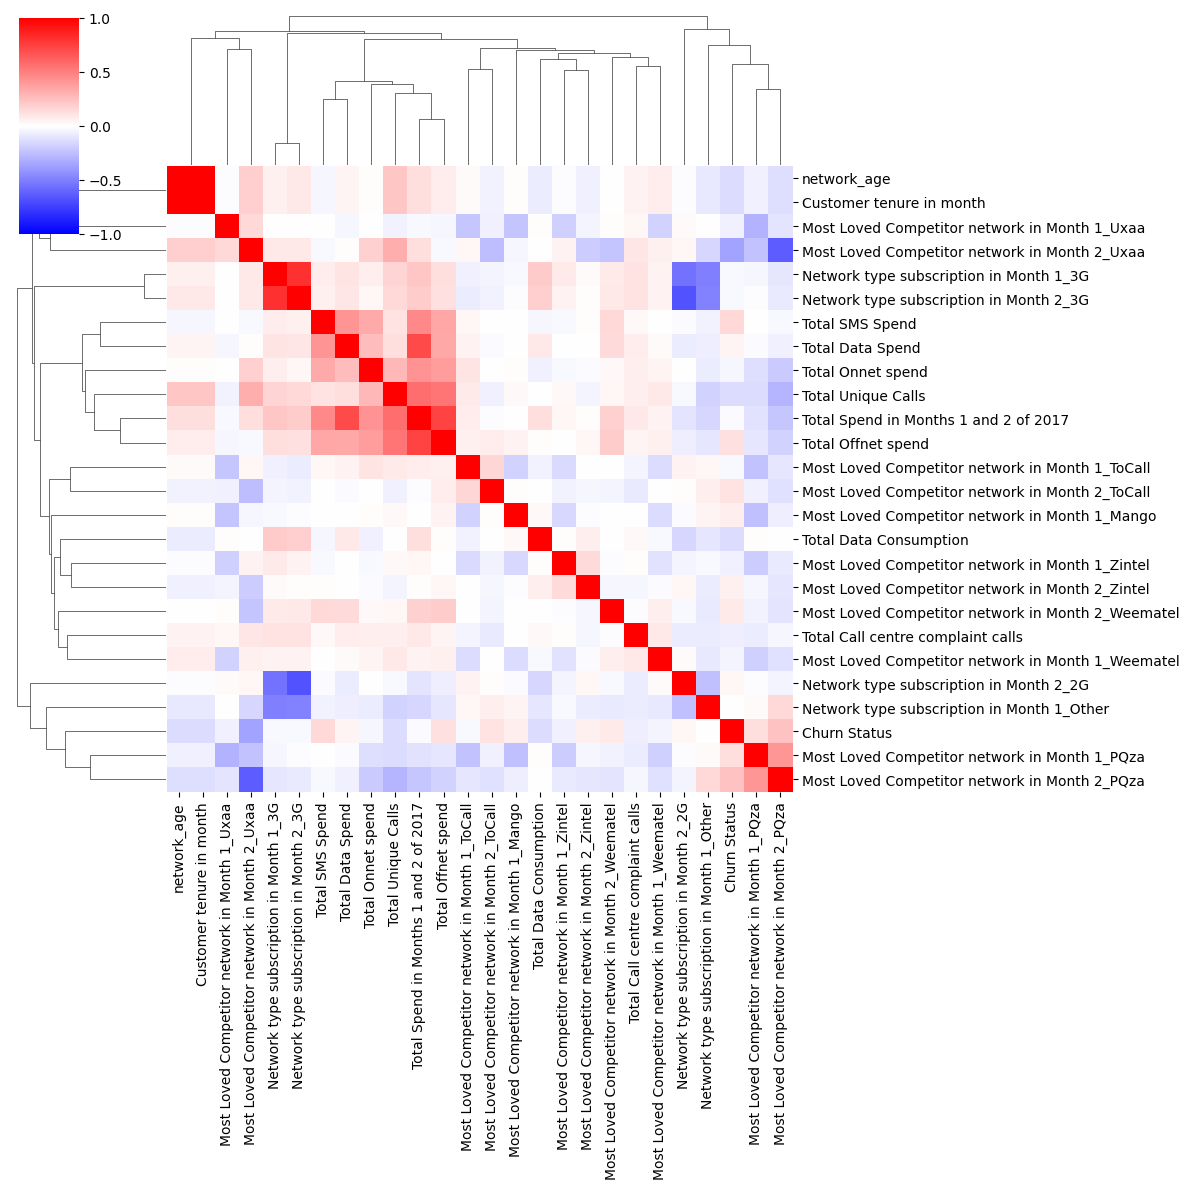

In [429]:
import seaborn as sns
matriz_corr=data.corr()
sns.clustermap(matriz_corr, cmap="bwr", vmin=-1, vmax=1, figsize=(12,12));

Hacemos la matriz de correlación una vez hemos pasado toda slas variables categóricas a dummies.

In [430]:


data2=data.copy()
rank1=np.linalg.matrix_rank(matriz_corr) #hay una columna a eliminar
cols=data.columns
for col in cols:
    cols2 = cols.drop(col) #Eliminamos una columna para ver si cambia el rango
    data2 = data2[cols2] #Cogemos el dataset sin esa columna
    rank2 = np.linalg.matrix_rank(data2.corr()) #Hallamos el rango de ese datset
    if rank1 == rank2: #Si los rangos siguen igual, se elimina esa columna porque es linealmente dependiente
        cols = cols2
        print(f'columna que hemos eliminado: {col}')
    else:
        data2 = data #si son distintos, esa columna es linealmente independiente y no se quita

#Nos quedamos con las columnas linealmente independientes
data= data[cols] 
#nos quitamos la columna Network type subscription in Month 1, que tb quitamos del conjunto de explotacion
data_explot=data[cols]

print(len(data.columns)) #trabajaremos con 26 variables, han aumentado tras la codificación de dummies

26


### Partición train y test

In [443]:
from sklearn.model_selection import train_test_split

x = data.drop('Churn Status', axis=1)
print(data.columns)
y = data['Churn Status']

#las vairables y contienen la columna churn
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

print(y_test)




Index(['network_age', 'Customer tenure in month',
       'Total Spend in Months 1 and 2 of 2017', 'Total SMS Spend',
       'Total Data Spend', 'Total Data Consumption', 'Total Unique Calls',
       'Total Onnet spend', 'Total Offnet spend',
       'Total Call centre complaint calls', 'Churn Status',
       'Network type subscription in Month 1_3G',
       'Network type subscription in Month 1_Other',
       'Network type subscription in Month 2_2G',
       'Network type subscription in Month 2_3G',
       'Most Loved Competitor network in Month 1_Mango',
       'Most Loved Competitor network in Month 1_PQza',
       'Most Loved Competitor network in Month 1_ToCall',
       'Most Loved Competitor network in Month 1_Uxaa',
       'Most Loved Competitor network in Month 1_Weematel',
       'Most Loved Competitor network in Month 1_Zintel',
       'Most Loved Competitor network in Month 2_PQza',
       'Most Loved Competitor network in Month 2_ToCall',
       'Most Loved Competitor networ

### Paso 3: Construcción y análisis de un modelo de regresión logística usando la librería scikit-klearn 

• Construye con sklearn un modelo de regresión logística (clase
sklearn.lineal_model.LogisticRegression). No te olvides de estandarizar las
variables de entrada. ¿Cuáles son los scores obtenidos en entrenamiento y en
test? ¿Hay sobreajuste? ¿Cómo se comparan con los obtenidos con el
DummyClassifier?


El método transform realiza la estandarización de las características basándose en las estadísticas aprendidas durante la fase de ajuste de fit().
La tasa de acierto obtenida en el entrenamiento es de 0.72 y en test 0.68, un poco menor. Nos encontramos sobreajuste cuando a la hora de hacer la tasa de acierto
sobre el conjunto de test encontramos un valor más pequeño que el score del entrenamiento, lo que quiere decir que el modelo se ajusta demasaido a los datos de entrenamiento 
y por tanto no generaliza bien. Como es un poco más bajo el score de test, podemos decir que  hay sobreajuste.

Si comparamos los scores con los de el DummyClasifier, es evidente que este modelo es mucho más preciso que un modelo basado en predecir siempre la clase que más se repite en los datos, ya que DummyClassifier tiene un score de 0.52 y este 0.733.

In [432]:
import sklearn ; from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Crear un objeto StandardScaler
xscaler = StandardScaler()

# Obtener las columnas numéricas
col_numericos = x_train.select_dtypes(include=['int64', 'float64']).columns

# Estandarizar solo las columnas numéricas en x_train
x_train_scaled = x_train.copy()
x_train_scaled[col_numericos] = xscaler.fit_transform(x_train[col_numericos])

# Estandarizar solo las columnas numéricas en x_test
x_test_scaled = x_test.copy()
x_test_scaled[col_numericos] = xscaler.transform(x_test[col_numericos])

# Crear un modelo de regresión logística
modelo = LogisticRegression()






modelo.fit(x_train_scaled,y_train)

print(modelo.coef_) # w0, w1, w2, ... calculados
print(modelo.intercept_ )

predicciones_01=modelo.predict(x_test_scaled) # Estimación clases, y_pred
print(predicciones_01)

probabilidades_01=modelo.predict_proba(x_test_scaled)  #USAREMOS MÁS ADELANTE ESTAS VARIABLES PARA EL PASO 3 DE LA SEMANA 3
print(probabilidades_01)




print('Tasa de acierto en train:',modelo.score(x_train_scaled,y_train) )
print('Tasa de acierto en test:',modelo.score(x_test_scaled,y_test) )





[[-0.12253674 -0.12230306 -0.71269442  0.27943718  0.926286   -0.77292729
  -0.15739299 -0.04380071  0.8347928  -0.06613772  0.31388935 -0.39240398
   0.31950276  0.00780992  0.77951605  0.33035858  0.10624401  0.34600244
  -0.02065442  0.01016795  0.66385082  0.57368487 -0.97406233  0.07232674
   0.56337206]]
[-0.2101842]
[0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1
 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0
 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1
 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1
 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1
 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1
 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0
 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1


C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

In [433]:
pd.DataFrame(x_test_scaled)

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1_3G,Network type subscription in Month 1_Other,Network type subscription in Month 2_2G,Network type subscription in Month 2_3G,Most Loved Competitor network in Month 1_Mango,Most Loved Competitor network in Month 1_PQza,Most Loved Competitor network in Month 1_ToCall,Most Loved Competitor network in Month 1_Uxaa,Most Loved Competitor network in Month 1_Weematel,Most Loved Competitor network in Month 1_Zintel,Most Loved Competitor network in Month 2_PQza,Most Loved Competitor network in Month 2_ToCall,Most Loved Competitor network in Month 2_Uxaa,Most Loved Competitor network in Month 2_Weematel,Most Loved Competitor network in Month 2_Zintel
663,1.935265,1.935190,-0.208415,-0.439333,-0.165802,-0.303650,-0.167566,0.294583,0.074760,-0.371427,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
737,0.617496,0.617576,0.274912,-0.104732,-0.127791,0.117611,1.751379,0.637643,-0.280457,0.407517,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
126,1.810708,1.810711,-0.428848,-0.305416,-0.162001,-0.303645,-0.523419,0.242550,-0.177482,0.018045,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0
354,-0.088594,-0.088594,0.236070,-0.061305,-0.116387,-0.303496,0.467648,-0.115048,1.723436,0.018045,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
1077,0.968954,0.968876,6.759682,10.429337,5.155847,0.622188,6.603617,4.254181,5.067717,-0.371427,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,-0.558262,-0.558184,-0.053070,0.607512,-0.173405,-0.182079,-0.540048,-0.223195,0.239736,-0.371427,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
958,-1.109647,-1.109649,-0.504627,-0.238458,-0.082177,1.148082,-0.633168,-0.297163,-0.368970,0.018045,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0
1078,-0.874019,-0.874021,-0.281716,0.255694,-0.184808,-0.303687,-0.423647,-0.505294,0.081132,-0.371427,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
779,-1.043798,-1.043721,0.057283,0.692071,0.020455,-0.209918,-0.476859,-0.217073,-0.177094,0.018045,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0


• Si no se especifica en LogisticRegression el parámetro C, este es 1, indicando
un grado medio de regularización. Al igual que con la regresión lineal, podemos
hacer que sklearn ajuste automáticamente ese parámetro de regularización
usando LogisticRegressionCV. ¿Qué obtienes ahora? ¿es mejor que el anterior
modelo?

Al usar LogisticRegressionCV() permitimos una selección automática el parametro C. Si eligiésemos LogisticRegression() con el parámetro C por defecto, corremos el riesgo 
de obtener un modelo menos robusto y generalizable, es decir, hay más probabilidades de que haya sobreajuste. Sin embargo, LogisticRegressionCV() ayuda a mitigar este riesgo al seleccionar automáticamente el mejor valor de C basándose en validación cruzada.

Podemos observar que los coeficientes son muy similares y los scores son iguales, pero en caso de que al usar LogisticRegresion() con C=1 tuviésemos sobreajuste, ajustar la regularización podría ayudarnos a conseguir un mejor modelo, pero en esto, no podemos decir que sea un mejor modelo ya que ambos tienen la misma precisión.

In [434]:
xscaler = StandardScaler() ; 
modelo= sklearn.linear_model.LogisticRegressionCV()



modelo.fit(x_train_scaled,y_train)

print('Coeficientes con sklearn',modelo.coef_) # w0, w1, w2, ... calculados
print(modelo.intercept_ )

y_pred=modelo.predict(x_test_scaled) # Estimación clases



print('Tasa de acierto en train:',modelo.score(x_train_scaled,y_train) )
print('Tasa de acierto en test:',modelo.score(x_test_scaled,y_test) )

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

Coeficientes con sklearn [[-0.12279661 -0.12277952 -0.24828418  0.23240635  0.29850369 -0.48332999
  -0.21139327 -0.0612554   0.50824526 -0.05790228  0.09731557 -0.21068781
   0.15807498  0.03458087  0.25240415  0.12141489 -0.04647179  0.01284493
  -0.08672912 -0.11319174  0.38910338  0.16642811 -0.74247905  0.03906622
   0.10711108]]
[0.11992077]
Tasa de acierto en train: 0.7297297297297297
Tasa de acierto en test: 0.6916167664670658


C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

# SEMANA 2

### Paso 1. Construcción y análisis de un modelo de regresión logística usando la librería statsmodels

• Construye un modelo de regresión logística usando la librería statsmodels (clase
Logit de statsmodels.api). ¿Obtiene los mismos coeficientes que sklearn? ¿Los
scores son los mismos?

Como esta librería no tiene una función que devuelva la precisión en el contexto de la clasificación como lo hace scikit-learn, hemos creado el modelo con statsmodels y para 
medir el score hemos usado la función accuracy_score de sklearn.metrics.

Los coeficientes difieren bastante ; se puede ver que dos de los primeros coeficientes de statsmodels son 527 y -527, y el resto de coeficientes también son distintos. 
Esto se puede deber a que StatsModels utiliza una parametrización del modelo logístico distinta a sklearn. En particular, los coeficientes de StatsModels están en una escala diferente debido a la parametrización específica utilizada. Sin embargo, ambas formas nos ofrecen una tasa de acierto de 71% en train y 73% en test.

In [435]:
import statsmodels.api as sm ; from sklearn.metrics import accuracy_score

model = sm.GLM(y_train.values, sm.add_constant(x_train_scaled),family=sm.families.Binomial())
result = model.fit()
result.summary()
preds_train= result.predict(sm.add_constant(x_train_scaled))
preds_test = result.predict(sm.add_constant(x_test_scaled))
preds_test  #probabilidades de pertenecer a la clase positiva

print('Coeficientes con statsmodels:',result.params)
umbral = 0.5

predicciones_clase_train = (preds_train > umbral).astype(int)
predicciones_clase_test = (preds_test > umbral).astype(int)

precision_train = accuracy_score(y_train, predicciones_clase_train)
print('score de train con statsmodels: ', precision_train)


precision_test = accuracy_score(y_test, predicciones_clase_test)
print('score de test con statsmodels: ', precision_test)

Coeficientes con statsmodels: const                                                 -0.763440
network_age                                         -331.348646
Customer tenure in month                             331.104279
Total Spend in Months 1 and 2 of 2017                 -0.799715
Total SMS Spend                                        0.285372
                                                        ...    
Most Loved Competitor network in Month 2_PQza          0.765809
Most Loved Competitor network in Month 2_ToCall        0.776775
Most Loved Competitor network in Month 2_Uxaa         -0.908580
Most Loved Competitor network in Month 2_Weematel      0.166274
Most Loved Competitor network in Month 2_Zintel        0.821604
Length: 26, dtype: float64
score de train con statsmodels:  0.7245817245817245
score de test con statsmodels:  0.688622754491018


C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instea

• Saca por pantalla la información estadística del modelo: desviación estándar de
los coeficientes, valores p, intervalos de confianza de los coeficientes. Con una
significancia estadística del 95%, ¿qué variables parece que no aportan
información?

Como para cada constante se está haciendo un contraste de significación, la hipótesis nula (se afirma que la variable no es significativa) se rechaza si el p-valor es menor
que el nivel de significación, que es un 5%, y por tanto nos quedamos con la hipótesis alternativa, que afirma que la variable sí es significativa para nuestras predicciones.
Por tanto, consideramos que no aportan información aquellas variables con un p-valor<0.05, que son: 

x3  Total Spend in Months 1 and 2 of 2017 

x4  Total SMS Spend

x5  Total Data Spend

x6  Total Data Consumption

x8  Total Onnet spend

x9  Total Offnet spend

x23 Most Loved Competitor network in Month 2_Uxaa


In [436]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  777
Model:                            GLM   Df Residuals:                      751
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -420.96
Date:                Thu, 30 Nov 2023   Deviance:                       841.92
Time:                        03:27:34   Pearson chi2:                     801.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2602
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -0.7634      1.002     -0.762      0.446      -2.728       1.201
network_age                                        -331.3486   1334.353     -0.248      0.804   -2946.633    2283.935
Customer tenure in month                            331.1043   1334.352      0.248      0.804   -2284.178    2946.387
Total Spend in Months 1 and 2 of 2017                -0.7997      0.270     -2.963      0.003      -1.329      -0.271
Total SMS Spend                                       0.2854      0.133      2.145      0.032       0.025       0.546
Total Data Spend                                      1.0454      0.281      3.723      0.000       0.495       1.596
Total Data Consumption                               -0.8159      0.190     -4.293      0.000      -1.188      -0.443
Total Unique Calls                                   -0.1435      0.140     -1.026      0.305      -0.418       0.131
Total Onnet spend                                    -0.0405      0.107     -0.378      0.705      -0.251       0.170
Total Offnet spend                                    0.8875      0.197      4.497      0.000       0.501       1.274
Total Call centre complaint calls                    -0.0661      0.089     -0.740      0.459      -0.241       0.109
Network type subscription in Month 1_3G               0.3558      0.329      1.082      0.279      -0.289       1.000
Network type subscription in Month 1_Other           -0.3729      0.808     -0.462      0.644      -1.956       1.211
Network type subscription in Month 2_2G               0.3694      0.784      0.471      0.638      -1.168       1.907
Network type subscription in Month 2_3G               0.0257      0.717      0.036      0.971      -1.380       1.432
Most Loved Competitor network in Month 1_Mango        1.2613      0.600      2.103      0.035       0.086       2.437
Most Loved Competitor network in Month 1_PQza         0.7590      0.598      1.270      0.204      -0.412       1.930
Most Loved Competitor network in Month 1_ToCall       0.5188      0.603      0.860      0.390      -0.663       1.700
Most Loved Competitor network in Month 1_Uxaa         0.7873      0.586      1.343      0.179      -0.362       1.936
Most Loved Competitor network in Month 1_Weematel     0.3907      0.616      0.634      0.526      -0.817       1.599
Most Loved Competitor network in Month 1_Zintel       0.4290      0.630      0.681      0.496      -0.806       1.664
Most Loved Competitor network in Month 2_PQza         0.7658      0.361      2.121      0.034       0.058       1.473
Most Loved Competitor network in Month 2_ToCall       0.7768      0.514      1.512      0.131      -0.230       1.784
Most Loved Comp

### Paso 2: Selección de variables con librería statsmodels

• Implementa un algoritmo similar al que implementaste en la práctica 2 para la
selección de variables con statsmodels:
1. Construye modelo con variables cols
2. Detecta qué variables parece que no aportan información de acuerdo al
criterio de los valores P. Si no encuentras ninguna, fin del algoritmo. Si
encuentras una o varias, toma la que tenga un valor P mayor y quítala de
cols. Vuelve a 1


• ¿Con cuántas variables te quedas usando este algoritmo? ¿Qué scores
obtienes? ¿Es mejor que el modelo sin seleccionar variables?



### Paso 3

Usando el mejor modelo de regresión logística que hayas obtenido hasta ahora, extrae
las siguientes métricas compáralas con el modelo dummy:


o Matriz de confusión. Usaremos solo los dos primeros parámetros y_true, y_pred

Usaremos el modelo de regresión logística que hemos obtenido con sklearn, aunque no habría problema en usar statsmodels ya que la precisión es la misma.

Para comprobar que la matriz es correcta, podemos dividir el número de predicciones correctas (VP+VN) entre el total de predicciones. (130+114)/(130+114+37+53)=0.73, que coincide con el score calculado anteriormente.

In [437]:
#y_pred fue definida anteriormente

print(sklearn.metrics.confusion_matrix(y_pred,y_test)) #y_real es y_test
score_test=(130+114)/(130+114+37+53)


[[113  47]
 [ 56 118]]


C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


o Curva ROC y área bajo la curva (AUC)

▪ Usaremos solo los parámetros y_true, y_score (las
probabilidades del modelo para la clase "positiva"), y pos_label
(cuál de las dos clases es la "positiva").
▪ Una vez calculado el TPR y el FPR habría que representar la
gráfica de TPR (eje vertical) en función del FPR (eje horizontal).
▪ Para calcular el AUC (área bajo la curva). Usaremos solo los parámetros y_true e y_score


Como el área bajo la curva es 0.7766861486607624, podemos decir que el modelo no es muy bueno pero tampoco malo.

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Text(0, 0.5, 'Tasa de verdaderos positivos')

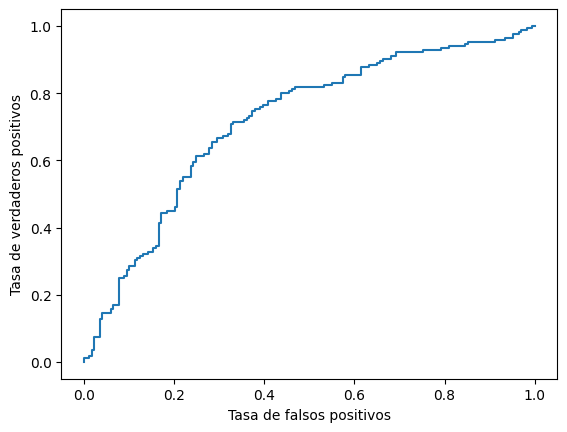

In [438]:
from matplotlib import pyplot as plt
prob_clase1=probabilidades_01[:,1]
prob_clase0=probabilidades_01[:,0]
tpr,fpr,_=sklearn.metrics.roc_curve(y_true=y_test, y_score=prob_clase1, pos_label=1) #nuestra clase positiva es 1
plt.plot(tpr,fpr) ;plt.xlabel('Tasa de falsos positivos') ; plt.ylabel('Tasa de verdaderos positivos')



o F1. Usaremos solo los parámetros y_true e y_score

El F1-sore viene a ser la media armónica entre la precisión y el recall (sensibilidad), que en nuestro caso nos da 0.7210031347962382.

In [439]:
print('F1 score:',sklearn.metrics.f1_score(y_true=y_test, y_pred=predicciones_01))

F1 score: 0.691860465116279


C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instea

o Curva de precision-recall. Usaremos los parámetros y_true, probas_pred (probabilidades
predichas para la clase positiva), pos_label (cuál de las dos
clases es la "positiva").▪ Una vez calculado el precision y el recall habría que representar
la gráfica de Precision (eje vertical) en función del Recall (eje
horizontal).

curva precision-recall: (array([0.49401198, 0.4954955 , 0.4939759 , 0.49546828, 0.4969697 ,
       0.49544073, 0.49695122, 0.49847095, 0.49693252, 0.49846154,
       0.49691358, 0.49845201, 0.5       , 0.49844237, 0.496875  ,
       0.4984326 , 0.5       , 0.50157729, 0.5       , 0.5015873 ,
       0.50318471, 0.50479233, 0.50641026, 0.50482315, 0.50645161,
       0.50809061, 0.50974026, 0.51140065, 0.5130719 , 0.5147541 ,
       0.51644737, 0.51815182, 0.51986755, 0.52159468, 0.52      ,
       0.52173913, 0.52013423, 0.52188552, 0.52364865, 0.52542373,
       0.52721088, 0.52901024, 0.53082192, 0.52920962, 0.53103448,
       0.53287197, 0.53472222, 0.53310105, 0.53496503, 0.53684211,
       0.53873239, 0.54063604, 0.54255319, 0.54448399, 0.54642857,
       0.54480287, 0.54676259, 0.54873646, 0.55072464, 0.55272727,
       0.55474453, 0.55677656, 0.55882353, 0.56088561, 0.56296296,
       0.56505576, 0.56343284, 0.56179775, 0.56390977, 0.56603774,
       0.56439394, 0.56653992, 0.5687

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


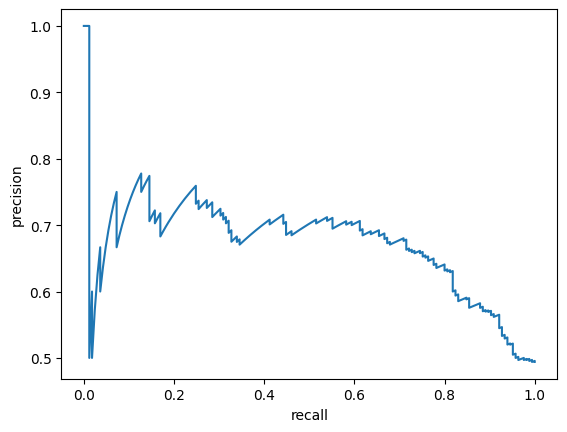

In [440]:
pr_recall=sklearn.metrics.precision_recall_curve(y_true=y_test, probas_pred=prob_clase1, pos_label=1)
print('curva precision-recall:',pr_recall)
precision,recall,_=pr_recall
plt.plot(recall,precision) ;plt.xlabel('recall') ; plt.ylabel('precision')
print(type(x_train_scaled))

# SEMANA 3

### Paso 5

Suponiendo que un falso positivo (un cliente que se predice que va a irse de la empresa
pero se queda) cuesta 1, y un falso positivo (un cliente que se predice que va a quedarse
en la empresa pero se va) cuesta 10, calcula, en función del umbral utilizado para decidir
con el modelo, el coste promedio. Calcula el umbral óptimo de decisión según esa curva.

Paso 1:En esta semana se usará otro tipo de modelo, el Naïve Bayes, y se realizará una
implementación propia. Para ello escribe la clase NaïveBayes, implementando al menos
los métodos siguientes:

El atributo Laplace indica si debe o no aplicarse la corrección de Laplace. Este y
cualquier otro atributo que necesites debe pasarse al constructor de la clase. Los
métodos fit, predict y score implementan una funcionalidad similar a la que hemos
comprobado en las librerías de Scikit Learn:

• fit(X,y): Calcula el modelo correspondiente a partir de los datos de train. En
nuestra implementación se puede pasar un data frame que analice los atributos
del dataset y calcule las probabilidades teniendo en cuenta si son valores
nominales (tipo object) o numéricos (tipo int, float…). En Naïve Bayes el modelo
es el conjunto de verosimilitudes y de probabilidades a priori, calculadas a partir
de los datos de train.

• predict(X): devuelve el conjunto de clases estimadas para cada uno de los datos
de test
• score(X, y): devuelve el accuracy medio, es decir, los aciertos en las
predicciones del conjunto pasado como argumento.

• score(X, y): devuelve el accuracy medio, es decir, los aciertos en las
predicciones del conjunto pasado como argumento.


In [460]:
class Naive_Bayes:
    def __init__(self,x_train_scaled,y_train,x_test_scaled=None,y_test=None,laplace=False):
        self.laplace=laplace
        self.x_train_scaled=x_train_scaled
        self.y_train=y_train
        self.x_test_scaled=x_test_scaled
        self.y_test=y_test
    def sacar_mean_std(self,col):
        mean=col.mean()
        
        std=col.std()
        return mean,std    
    def prob_x_distribucion_normal(self,x,mean,sigma)->callable: #
        '''introducimos la función de densidad de probabilidad con parámetros determinados para cada variable numérica'''
        return (1 / np.sqrt(2 * np.pi) * sigma) * np.exp(-((x-mean)**2 / (2 * sigma**2)))    
    def prob_col_numerica(self,col,mean,sigma):
        col=pd.Series(col) #para aplicar apply debe ser una serie
        
        try:
            return col.apply(lambda x:self.prob_x_distribucion_normal(x,mean=mean,sigma=sigma))  #col no cambia, para ello tendríamos que volver a definir la var
        except:
            print(sigma)
            raise Exception
    def prob_col_nominal(self,col):  #trataremos las cols de dummies              
        col=pd.Series(col)
        longitud=len(col)
        if self.laplace==True:
            muestra_add=1 #añadimos muestras ficticias
        else:
            muestra_add=0 #no aplicamos laplace
            d_probs={}
        vc=col.value_counts()
        for fila in col:
            d_probs[fila]=(vc.loc[fila]+muestra_add)/(longitud+2*muestra_add) #numero de veces que aparece ese atributo/numero de muestras
        return d_probs

    def fit(self,X:pd.DataFrame,y):  #train x scaled, train y
        X=pd.DataFrame(X)
        #primero separo muestras de clase 0 y 1
        muestras_c0=X[y==0]
        muestras_c1=X[y==1]
        #diferencio vars numericas y categoricas
        vars_num_c0 = muestras_c0.loc[:, data.dtypes != 'int32'] ;vars_dummy_c0=muestras_c0.loc[:, data.dtypes == 'int32'] #int32 son el tipo que solo tienen las variables dummy
        vars_num_c1 = muestras_c1.loc[:, data.dtypes != 'int32'] ;vars_dummy_c1=muestras_c1.loc[:, data.dtypes == 'int32']
        
        list_mean_std_c0=[] ; list_mean_std_c1=[]
        list_prob_dummy_c0=[] ; list_prob_dummy_c1=[]
        #listas de tuplas con la media y el error correspondientes a cada variable, separando los conjuntos de las 2 clases.

        
        resultados = vars_num_c0.agg(['mean', 'std']).T
        list_mean_std_c0 = [tuple(x) for x in resultados.values]
        resultados = vars_num_c1.agg(['mean', 'std']).T
        list_mean_std_c1 = [tuple(x) for x in resultados.values] #la media y error para cada columna (cambian dependiendo de la clase que condiciona)


        for col in vars_dummy_c1.columns:
            col=X[col].values
            list_prob_dummy_c1.append(self.prob_col_nominal(col))
        for col in vars_dummy_c0.columns:
            col=X[col].values
            list_prob_dummy_c0.append(self.prob_col_nominal(col))
        
        p_c1=len(muestras_c1)/(len(muestras_c1)+len(muestras_c0)) ; p_c0=1-p_c1
        
        return list_mean_std_c0,list_mean_std_c1,list_prob_dummy_c0,list_prob_dummy_c1,p_c0,p_c1

    def predict(self,X:pd.DataFrame): #x_test_scaled
        
        list_mean_std_c0,list_mean_std_c1,list_prob_dummy_c0,list_prob_dummy_c1,p_c0,p_c1=self.fit(self.x_train_scaled,self.y_train)
        prob_atributos_test_c0=[] ; prob_atributos_test_c1=[]
        
        for lista_prob,lista_param_cont,lista_dicts in (prob_atributos_test_c0,list_mean_std_c0,list_prob_dummy_c0),(prob_atributos_test_c1,list_mean_std_c1,list_prob_dummy_c1):
            for colu in X:
                col=X[colu].values #cogemos los valores dentro de la serie
                
                
                if X[colu].dtype!='int32': #var continua
                    
                    
                    mean,sigma=lista_param_cont.pop(0)
                    #print(mean,sigma)
                    lista_prob.append(self.prob_col_numerica(col,mean,sigma))
                else:
                    
                    l=[] ; d=lista_dicts.pop(0)    #esto es una lista de dicts con las probabilidades por cada valor
                    
                    for value in col:
                        l.append(d[value])
                    lista_prob.append(pd.Series(l))
        
        df_probabilidades_c0,df_probabilidades_c1=pd.DataFrame(prob_atributos_test_c0).T,pd.DataFrame(prob_atributos_test_c1).T
        
        prob_finales_test_c0=df_probabilidades_c0.prod(axis=1)*p_c0 #hacemos los productorios y multiplicamos por la prob de la clase
        prob_finales_test_c1=df_probabilidades_c1.prod(axis=1)*p_c1
        df_probabilidades=pd.DataFrame([prob_finales_test_c0,prob_finales_test_c1]).T
        predicciones=[]
        for i in range(len(df_probabilidades)):
            
            if df_probabilidades[0][i]>df_probabilidades[1][i]:
                predicciones.append(0)
            else:
                predicciones.append(1)
        
        return pd.Series(predicciones) #misma longitud que x_test: 334 filas
        
    def score(self,X,y): #x_test_scaled, y_test
        predicciones=self.predict(pd.DataFrame(X))
        #del conjunto test
        pd.set_option('display.max_rows', 25)
        
        predicciones=predicciones.reset_index(drop=True) #tenemos que quitar los indices para ir comparando de uno en uno
        y=y.reset_index(drop=True)                      #la primera predicción que tenemos se corresponde con la primera fila del conjunto test
        longitud=len(y) ; contador=0
        
        for i,k in zip(predicciones,y):
            if i==k: 
                contador +=1 #un acierto más
        print('Score:') 
        return contador/longitud
    
pd.set_option('display.max_rows', 25)
 #para dividir entre filas de clase 0 y 1,
prueba=Naive_Bayes(pd.DataFrame(x_train_scaled, columns=x_train.columns, index=x_train.index),y_train)        
#necesitamos que x_train_scaled tenga los índices de filas de x_train
a=prueba.score(x_test_scaled,y_test) 

a


        

0.5419161676646707

In [372]:
pd.DataFrame(y_test)
#pd.DataFrame(x_train_scaled)
#muestras_c0=pd.DataFrame(muestras_c0)
#muestras_c0.info()

,Churn Status
663,0
737,0
126,0
354,1
1077,0
...,...
1021,1
958,1
1078,0
779,1


In [116]:
class prueba:
    def __init__(self,laplace=False):
        self.laplace=laplace
    def printeo(laplace):
        if laplace==True:
            print('yeaaaah')
        else:
            pass
        
h=prueba(laplace=True)
x_train_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, 952 to 1061
Data columns (total 25 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   network_age                                        777 non-null    int64  
 1   Customer tenure in month                           777 non-null    float64
 2   Total Spend in Months 1 and 2 of 2017              777 non-null    float64
 3   Total SMS Spend                                    777 non-null    float64
 4   Total Data Spend                                   777 non-null    float64
 5   Total Data Consumption                             777 non-null    float64
 6   Total Unique Calls                                 777 non-null    int64  
 7   Total Onnet spend                                  777 non-null    int64  
 8   Total Offnet spend                                 777 non-null    int64  
 9   Total Call c

In [43]:
print(y_train,x_train)


#print(len(x_train),len(muestras_c0),len(muestras_c1))

import pandas as pd
color=pd.Series([0,1,0,1,1])
l=len(color)
vc=color.value_counts()
#print(vc.loc['r']/l)
frecs=[]
for casilla in color:
    frecs.append(vc.loc[casilla]/l)
print(frecs)

952     0
651     0
824     1
434     1
789     1
       ..
715     0
905     0
1096    1
235     0
1061    0
Name: Churn Status, Length: 777, dtype: int64       network_age  Customer tenure in month  \
952           103                      3.43   
651          1856                     61.87   
824          1606                     53.53   
434           136                      4.53   
789          1502                     50.07   
...           ...                       ...   
715          3762                    125.40   
905           418                     13.93   
1096         2226                     74.20   
235          1794                     59.80   
1061         1284                     42.80   

      Total Spend in Months 1 and 2 of 2017  Total SMS Spend  \
952                                153.7964             3.50   
651                                646.1308             3.50   
824                                154.6272            49.85   
434                    